# Pricing Theory



In [1]:
import numpy as np
import matplotlib.pyplot as plt

params = {'legend.fontsize': 'x-large',
      'figure.figsize': (5, 5),
      "figure.autolayout": True,
      'axes.labelsize': 'x-large',
      'axes.titlesize': 'x-large',
      'xtick.labelsize': 'x-large',
      'ytick.labelsize': 'x-large',
      'lines.linewidth': 4}

plt.rcParams.update(params)
%matplotlib inline

## Futures
- A futures contract is an agreement between two parties to buy or
sell an asset at a certain time **in the future for a certain price**.
- For example,
    - Index futures: [TX](https://www.taifex.com.tw/cht/2/tX), [SPX](https://www.investing.com/indices/us-spx-500-futures)
        - 鉅亨網指數期貨首頁：https://www.cnyes.com/futures/index.htm?ga=nav
    - Equity futures
        - PChome股市台股股票期貨清單：https://pchome.megatime.com.tw/group/mkt5/cidE008.html
    - Commodity futures: [oil](https://www.cnyes.com/futures/energy.aspx?ga=nav), [gold](https://www.cnyes.com/futures/html5chart/GCCON.html), [copper](https://www.cnyes.com/futures/html5chart/CDCS.html), sugar, wool, and so on.

### Example: Long Position & Short Position in Futures

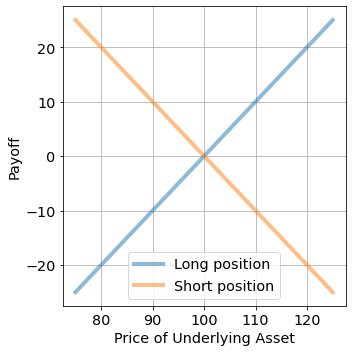

In [2]:
S0 = 100
S = np.linspace(75, 125, 100)

payoff_long_position = S - S0
payoff_short_position = S0 - S

plt.figure(figsize = (5, 5))
plt.plot(S, payoff_long_position, alpha = 0.5)
plt.plot(S, payoff_short_position, alpha = 0.5)
plt.xlabel("Price of Underlying Asset")
plt.ylabel("Payoff")
plt.grid(True)
plt.legend(["Long position", "Short position"])
plt.savefig("futures_long_short.pdf")

### Example: Hedging

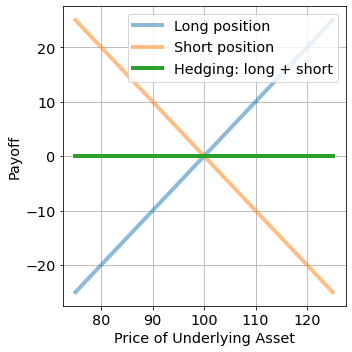

In [3]:
payoff_hedge = payoff_long_position + payoff_short_position

plt.figure(figsize = (5, 5))
plt.plot(S, payoff_long_position, alpha = 0.5)
plt.plot(S, payoff_short_position, alpha = 0.5)
plt.plot(S, payoff_hedge)
plt.xlabel("Price of Underlying Asset")
plt.ylabel("Payoff")
plt.grid(True)
plt.legend(["Long position", "Short position", "Hedging: long + short"])
plt.savefig("futures_hedged.pdf")

## Options
- A **call option** gives the holder of the option the right to **buy** an asset by a certain date for a certain price.
- A **put option** gives the holder the right to **sell** an asset by a certain date for a certain price.
- The date specified in the contract is known as **the expiration date** or **the maturity date**.
- The price specified in the contract is known as **the exercise price** or **the strike price**.
- **European options** can be exercised only on the expiration date itself, whereas **American options** can be exercised at any time up to the
expiration date.
- For example,
    - Index options: [TXO](https://www.taifex.com.tw/cht/2/tXO)
    - Equity options

### Example: Payoff for Call & Put

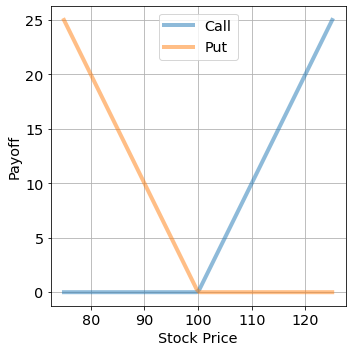

In [4]:
c = 0 
p = 0

X = 100
S = np.linspace(75, 125, 100)

payoff_call = np.maximum(S - X, 0) - c
payoff_put = np.maximum(X - S, 0) - p

plt.figure(figsize = (5, 5))
plt.plot(S, payoff_call, alpha = 0.5)
plt.plot(S, payoff_put, alpha = 0.5)
plt.xlabel("Stock Price")
plt.ylabel("Payoff")
plt.grid(True)
plt.legend(["Call", "Put"])
plt.tight_layout()
plt.savefig("options_call_put.pdf")

### Example: Moneyness

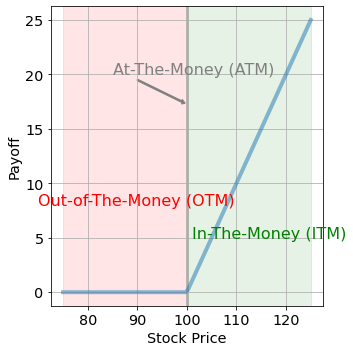

In [5]:
S = np.linspace(75, 125, 100)
intrinsic_value = np.maximum(S - X, 0)

plt.figure(figsize = (5, 5))
plt.plot(S, intrinsic_value, alpha = 0.5)
plt.xlabel("Stock Price")
plt.ylabel("Payoff")
plt.grid(True)
plt.axvspan(75, 100, color = "red", alpha = 0.1)
plt.axvspan(100, 100, color = "gray", alpha = 0.5, linewidth = 3)
plt.axvspan(100, 125, color = "green", alpha = 0.1)
plt.text(101, 5, "In-The-Money (ITM)", fontsize = 16, color = "g")
plt.text(70, 8, "Out-of-The-Money (OTM)", fontsize = 16, color = "r")
plt.text(85, 20, "At-The-Money (ATM)", fontsize = 16, color = "gray")
plt.arrow(90, 19.5, 9, -2, width = 0.15, color = "gray")
plt.savefig("options_moneyness.pdf")

### Example: Long/Short Position in Call/Put

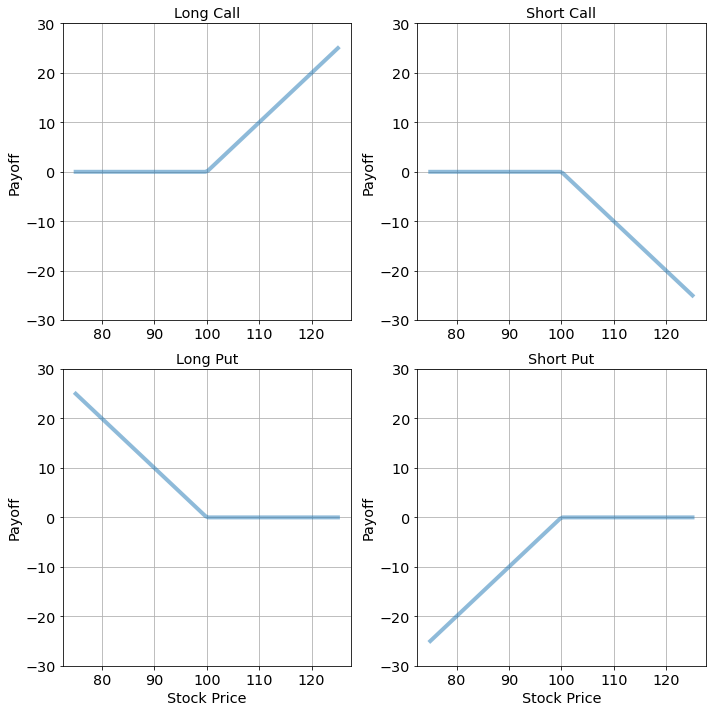

In [6]:
S = np.linspace(75, 125, 100)
payoff_call = np.maximum(S - X, 0)
payoff_put = np.maximum(X - S, 0)

plt.figure(figsize = (10, 10))
axes = plt.subplot(221)
plt.plot(S, payoff_call, alpha = 0.5)
plt.ylabel("Payoff")
plt.grid(True)
plt.title("Long Call")
axes.set_ylim(-30, 30)

axes = plt.subplot(222)
plt.plot(S, -payoff_call, alpha = 0.5)
plt.ylabel("Payoff")
plt.grid(True)
plt.title("Short Call")
axes.set_ylim(-30, 30)

axes = plt.subplot(223)
plt.plot(S, payoff_put, alpha = 0.5)
plt.xlabel("Stock Price")
plt.ylabel("Payoff")
plt.grid(True)
plt.title("Long Put")
axes.set_ylim(-30, 30)

axes = plt.subplot(224)
plt.plot(S, -payoff_put, alpha = 0.5)
plt.xlabel("Stock Price")
plt.ylabel("Payoff")
plt.grid(True)
plt.title("Short Put")
axes.set_ylim(-30, 30)
plt.savefig("options_four.pdf")

### Example: Hedging by Protective Put

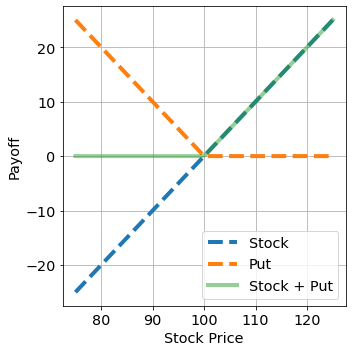

In [7]:
X = 100
S = np.linspace(75, 125, 100)
payoff_stock = S - X
payoff = payoff_stock + payoff_put

plt.figure(figsize = (5, 5))
plt.plot(S, payoff_stock, linestyle = "--")
plt.plot(S, payoff_put, linestyle = "--")
plt.plot(S, payoff, alpha = 0.5)
plt.xlabel("Stock Price")
plt.ylabel("Payoff")
plt.grid(True)
plt.legend(["Stock", "Put", "Stock + Put"])
plt.savefig("options_long_stock_long_put.pdf")

### Example: Put-Call Parity

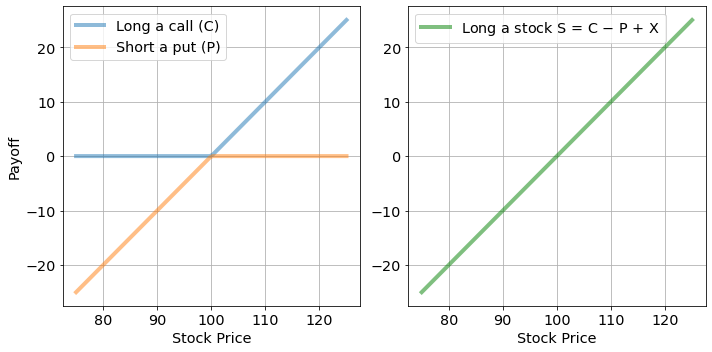

In [8]:
intrinsic_value_call = np.maximum(S - X, 0)
intrinsic_value_put = np.maximum(X - S, 0)

plt.figure(figsize = (10, 5))
plt.subplot(121)
plt.plot(S, intrinsic_value_call, alpha = 0.5)
plt.plot(S, -intrinsic_value_put, alpha = 0.5)
plt.xlabel("Stock Price")
plt.ylabel("Payoff")
plt.grid(True)
plt.legend(["Long a call (C)", "Short a put (P)"])

plt.subplot(122)
plt.plot(S, S - X, "g", alpha = 0.5)
plt.xlabel("Stock Price")
plt.grid(True)
plt.legend(["Long a stock S = C $-$ P + X"])

plt.savefig("options_put_call_parity.pdf")

### Example: Option Value = Intrinsic Value + Time Value

In [9]:
import scipy.stats

def call_bs_formula(S, X, r, v, T):

    d1 = (np.log(S / X) + (r + v ** 2 * 0.5) * T) / np.sqrt(T) / v
    d2 = d1 - v * np.sqrt(T)
    c = S * scipy.stats.norm.cdf(d1) - X * np.exp(-r * T) * scipy.stats.norm.cdf(d2)
    return c

def put_bs_formula(S, X, r, v, T):

    d1 = (np.log(S / X) + (r + v ** 2 * 0.5) * T) / np.sqrt(T) / v
    d2 = d1 - v * np.sqrt(T)
    p = X * np.exp(-r * T) * scipy.stats.norm.cdf(-d2) - S * scipy.stats.norm.cdf(-d1)
    return p

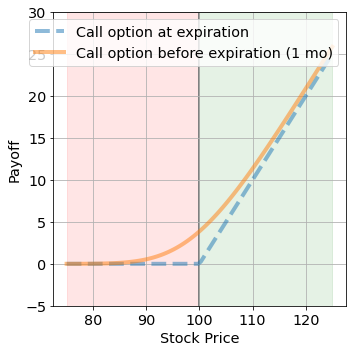

In [10]:
S = np.linspace(75, 125, 100)
r = 0.1
v = 0.3
T = 1.0 / 12.0

c = call_bs_formula(S, X, r, v, T)
intrinsic_value = np.maximum(S - X, 0)
payoff_call = c

plt.figure(figsize = (5, 5))
plt.plot(S, intrinsic_value, ls = "--", alpha = 0.5)
plt.plot(S, payoff_call, alpha = 0.5)
plt.ylim(-5, 30)
plt.xlabel("Stock Price")
plt.ylabel("Payoff")
plt.grid(True)
plt.axvspan(75, 100, color = "red", alpha = 0.1)
plt.axvspan(100, 100, color = "gray", alpha = 1, linewidth = 2)
plt.axvspan(100, 125, color = "green", alpha = 0.1)
plt.legend(["Call option at expiration", "Call option before expiration (1 mo)"])
plt.savefig("options_time_value.pdf")

### Example: There is No Free Lunch

In [11]:
r = 0.1
v = 0.3
T = 1.0 / 12.0
c0 = call_bs_formula(100, X, r, v, T)
print(c0)

3.870367622778332


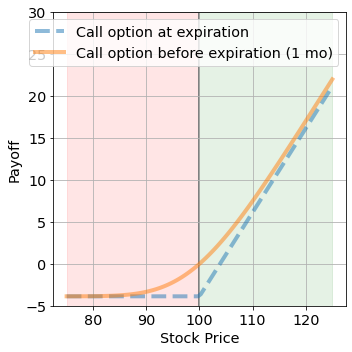

In [12]:
S = np.linspace(75, 125, 100)
c = call_bs_formula(S, X, r, v, T)
intrinsic_value = np.maximum(S - X, 0) - c0 
payoff_call = c - c0

plt.figure(figsize = (5, 5))
plt.plot(S, intrinsic_value, alpha = 0.5, ls = "--")
plt.plot(S, payoff_call, alpha = 0.5)
plt.ylim(-5, 30)
plt.xlabel("Stock Price")
plt.ylabel("Payoff")
plt.grid(True)
plt.axvspan(75, 100, color = "red", alpha = 0.1)
plt.axvspan(100, 100, color = "gray", alpha = 1, linewidth = 2)
plt.axvspan(100, 125, color = "green", alpha = 0.1)
plt.legend(["Call option at expiration", "Call option before expiration (1 mo)"])
plt.savefig("options_minus_c0.pdf")

### Example: Long/Short Position in Call/Put (Revisited)



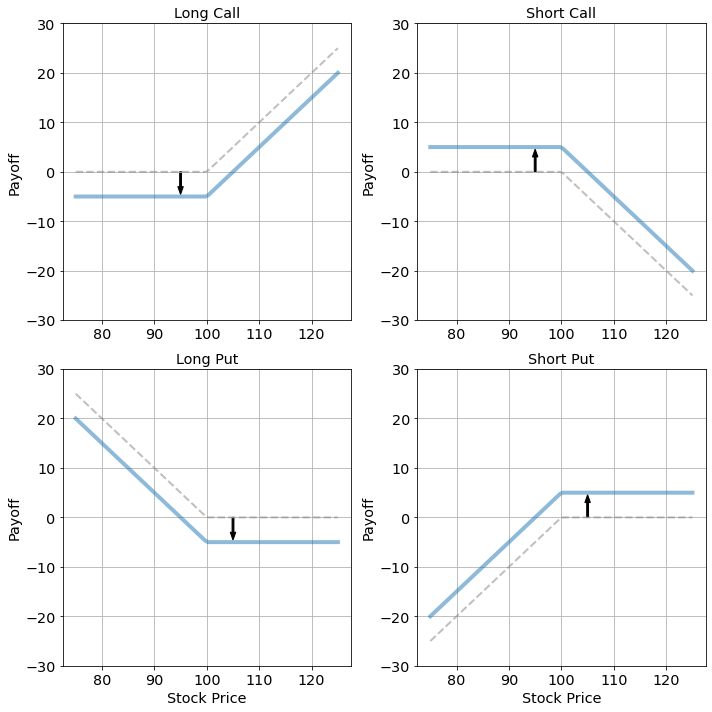

In [13]:
S = np.linspace(75, 125, 100)
payoff_call = np.maximum(S - X, 0)
payoff_put = np.maximum(X - S, 0)
premium = 5

plt.figure(figsize = (10, 10))
axes = plt.subplot(221)
plt.plot(S, payoff_call - premium, alpha = 0.5)
plt.plot(S, payoff_call, alpha = 0.5, ls = "--", lw = 2, color = "gray")
plt.arrow(95, 0, 0, -3, width = 0.35, color = "black")
plt.ylabel("Payoff")
plt.grid(True)
plt.title("Long Call")
axes.set_ylim(-30, 30)

axes = plt.subplot(222)
plt.plot(S, -payoff_call + premium, alpha = 0.5)
plt.plot(S, -payoff_call, alpha = 0.5, ls = "--", lw = 2, color = "gray")
plt.arrow(95, 0, 0, 3, width = 0.35, color = "black")
plt.ylabel("Payoff")
plt.grid(True)
plt.title("Short Call")
axes.set_ylim(-30, 30)

axes = plt.subplot(223)
plt.plot(S, payoff_put - premium, alpha = 0.5)
plt.plot(S, payoff_put, alpha = 0.5, ls = "--", lw = 2, color = "gray")
plt.arrow(105, 0, 0, -3, width = 0.35, color = "black")
plt.xlabel("Stock Price")
plt.ylabel("Payoff")
plt.grid(True)
plt.title("Long Put")
axes.set_ylim(-30, 30)

axes = plt.subplot(224)
plt.plot(S, -payoff_put + premium, alpha = 0.5)
plt.plot(S, -payoff_put, alpha = 0.5, ls = "--", lw = 2, color = "gray")
plt.arrow(105, 0, 0, 3, width = 0.35, color = "black")
plt.xlabel("Stock Price")
plt.ylabel("Payoff")
plt.grid(True)
plt.title("Short Put")
axes.set_ylim(-30, 30)
plt.savefig("options_four_revisited.pdf")

### Example: Straddle, Strangle, Butterfly

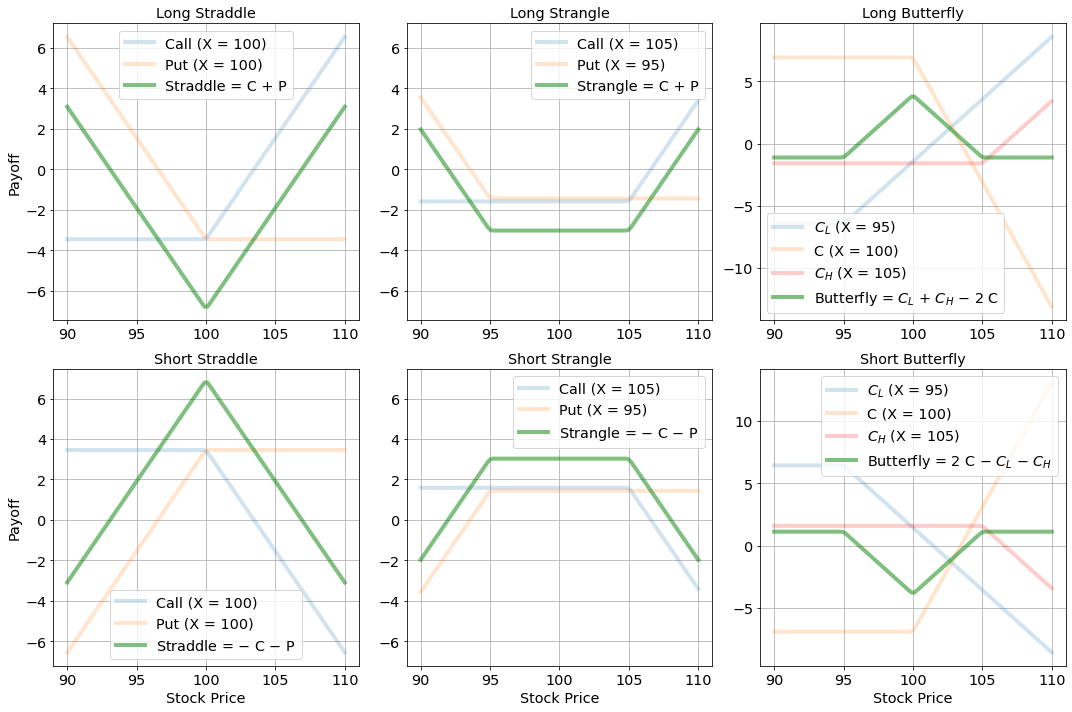

In [63]:
r = 0
v = 0.3

# Long Straddle

S0 = 100
X = 100

p0 = put_bs_formula(S0, X, r, v, 1 / 12) 
c0 = call_bs_formula(S0, X, r, v, 1 / 12)

S = np.linspace(90, 110, 100)
p = put_bs_formula(S, X, r, v, 0.00001) 
payoff_put = p - p0
c = call_bs_formula(S, X, r, v, 0.00001)
payoff_call = c - c0

plt.figure(figsize = (15, 10))
plt.subplot(231)
plt.plot(S, payoff_call, alpha = 0.2)
plt.plot(S, payoff_put, alpha = 0.2)
plt.plot(S, payoff_call + payoff_put, alpha = 0.5, c = "green")
plt.ylabel("Payoff")
plt.grid(True)
plt.legend(["Call (X = 100)", "Put (X = 100)", "Straddle = C + P"])
plt.title("Long Straddle")

y0, y1 = plt.ylim()

# Long Strangle

X_L = 95
X_H = 105

p0 = put_bs_formula(S0, X_L, r, v, 1 / 12) 
c0 = call_bs_formula(S0, X_H, r, v, 1 / 12)

S = np.linspace(90, 110, 100)
p = put_bs_formula(S, X_L, r, v, 0.00001) 
payoff_put = p - p0
c = call_bs_formula(S, X_H, r, v, 0.00001)
payoff_call = c - c0

plt.subplot(232)
plt.plot(S, payoff_call, alpha = 0.2)
plt.plot(S, payoff_put, alpha = 0.2)
plt.plot(S, payoff_call + payoff_put, alpha = 0.5, c = "green")
plt.ylim(y0, y1)
plt.grid(True)
plt.legend(["Call (X = 105)", "Put (X = 95)", "Strangle = C + P"])
plt.title("Long Strangle")

# Long Butterfly

X_L = 95
X = 100
X_H = 105

c0_L = call_bs_formula(S0, X_L, r, v, 1 / 12) 
c0 = call_bs_formula(S0, X, r, v, 1 / 12) 
c0_H = call_bs_formula(S0, X_H, r, v, 1 / 12)

S = np.linspace(90, 110, 100)
c_L = call_bs_formula(S, X_L, r, v, 0.00001)
c = call_bs_formula(S, X, r, v, 0.00001)
c_H = call_bs_formula(S, X_H, r, v, 0.00001)
payoff = (c_L - c0_L) + (c_H - c0_H) - 2 * (c - c0)

plt.subplot(233)
plt.plot(S, c_L - c0_L, alpha = 0.2)
plt.plot(S, -2 * (c - c0), alpha = 0.2)
plt.plot(S, c_H - c0_H, alpha = 0.2, c = "r")
plt.plot(S, payoff, alpha = 0.5, c = "green")
plt.grid(True)
plt.legend(["$C_L$ (X = 95)", "C (X = 100)", "$C_H$ (X = 105)", "Butterfly = $C_L$ + $C_H$ $-$ 2 C"])
plt.title("Long Butterfly")

# Sell Straddle

S0 = 100
X = 100

p0 = put_bs_formula(S0, X, r, v, 1 / 12) 
c0 = call_bs_formula(S0, X, r, v, 1 / 12)

S = np.linspace(90, 110, 100)
p = put_bs_formula(S, X, r, v, 0.00001) 
payoff_put = p - p0
c = call_bs_formula(S, X, r, v, 0.00001)
payoff_call = c - c0

plt.subplot(234)
plt.plot(S, -payoff_call, alpha = 0.2)
plt.plot(S, -payoff_put, alpha = 0.2)
plt.plot(S, -(payoff_call + payoff_put), alpha = 0.5, c = "green")
plt.xlabel("Stock Price")
plt.ylabel("Payoff")
plt.grid(True)
plt.legend(["Call (X = 100)", "Put (X = 100)", "Straddle = $-$ C $-$ P"])
plt.title("Short Straddle")

y0, y1 = plt.ylim()

# Sell Strangle

X_L = 95
X_H = 105

p0 = put_bs_formula(S0, X_L, r, v, 1 / 12) 
c0 = call_bs_formula(S0, X_H, r, v, 1 / 12)

S = np.linspace(90, 110, 100)
p = put_bs_formula(S, X_L, r, v, 0.00001) 
payoff_put = p - p0
c = call_bs_formula(S, X_H, r, v, 0.00001)
payoff_call = c - c0

plt.subplot(235)
plt.plot(S, -payoff_call, alpha = 0.2)
plt.plot(S, -payoff_put, alpha = 0.2)
plt.plot(S, -(payoff_call + payoff_put), alpha = 0.5, c = "green")
plt.ylim(y0, y1)
plt.xlabel("Stock Price")
plt.grid(True)
plt.legend(["Call (X = 105)", "Put (X = 95)", "Strangle = $-$ C $-$ P"])
plt.title("Short Strangle")

# Sell Butterfly

X_L = 95
X = 100
X_H = 105

c0_L = call_bs_formula(S0, X_L, r, v, 1 / 12) 
c0 = call_bs_formula(S0, X, r, v, 1 / 12) 
c0_H = call_bs_formula(S0, X_H, r, v, 1 / 12)

S = np.linspace(90, 110, 100)
c_L = call_bs_formula(S, X_L, r, v, 0.00001)
c = call_bs_formula(S, X, r, v, 0.00001)
c_H = call_bs_formula(S, X_H, r, v, 0.00001)
payoff = (c_L - c0_L) + (c_H - c0_H) - 2 * (c - c0)

plt.subplot(236)
plt.plot(S, -(c_L - c0_L), alpha = 0.2)
plt.plot(S, 2 * (c - c0), alpha = 0.2)
plt.plot(S, -(c_H - c0_H), alpha = 0.2, c = "r")
plt.plot(S, -payoff, alpha = 0.5, c = "green")
plt.xlabel("Stock Price")
plt.grid(True)
plt.legend(["$C_L$ (X = 95)", "C (X = 100)", "$C_H$ (X = 105)", "Butterfly = 2 C $-$ $C_L$ $-$ $C_H$"])
plt.title("Short Butterfly")

plt.savefig("options_trading_strategies.pdf")

### Example: BOPM for European Call Option Prices
* See pp. 262-270 of the slides [BOPM](https://www.csie.ntu.edu.tw/~lyuu/finance1/2018/20180328.pdf).
* For demonstration, I use $n = 3$ but the resulting price converges to the closed-form formula as $n \rightarrow \infty$.

In [15]:
s0 = 160 # spot price
X = 150  # strike price
n = 3    # periods
R = 1.2  # gross return for each period; D = 1 / R is the discount factor
u = 1.5  # size of up move
d = 0.5  # size of down move

In [16]:
p = (R - d) / (u - d) # probability of up move under risk-neutral probability measure

tree = np.zeros([n + 1, n + 1])
tree[0, 0] = s0
for period in range(1, n + 1):
    for level in range(period  + 1):
        factor = u ** (period - level) * d ** (level)
        tree[level, period] = s0 * factor

print(tree)

[[160. 240. 360. 540.]
 [  0.  80. 120. 180.]
 [  0.   0.  40.  60.]
 [  0.   0.   0.  20.]]


In [17]:
for level in range(n + 1):
    payoff = tree[level, n] - X
    tree[level, n] = payoff if payoff > 0 else 0
    
print(tree)

[[160. 240. 360. 390.]
 [  0.  80. 120.  30.]
 [  0.   0.  40.   0.]
 [  0.   0.   0.   0.]]


In [18]:
for period in range(n - 1, -1, -1):
    for level in range(period + 1):
        tree[level, period] = (p * tree[level, period + 1] + (1 - p) * tree[level + 1, period + 1]) / R

print(tree)

[[ 85.06944444 141.45833333 235.         390.        ]
 [  0.          10.20833333  17.5         30.        ]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]]


In [19]:
print("c =", round(tree[0, 0], 2))

c = 85.07


#### Exercise: Put Price?
* Simply change the payoff function to $\max(K - S_t, 0)$.

In [20]:
tree = np.zeros([n + 1, n + 1])
tree[0, 0] = s0
for period in range(1, n + 1):
    for level in range(period + 1):
        factor = u ** (period - level) * d ** (level)
        tree[level, period] = s0 * factor

for level in range(n + 1):
    payoff = X - tree[level, n]  # <<<<<<<<< key change
    tree[level, n] = payoff if payoff > 0 else 0

for period in range(n - 1, -1, -1):
    for level in range(period + 1):
        tree[level, period] = (p * tree[level, period + 1] + (1 - p) * tree[level + 1, period + 1]) / R

print("p =", round(tree[0, 0], 2))

p = 11.88


#### Exercise: BOPM for American Option Prices
* You can exercise anytime during the option lifespan.
* W/o paying dividends, the American call price is equal to the European call price.
* So we proceed to show you the American put option.

In [21]:
tree = np.zeros([n + 1, n + 1])
tree[0, 0] = s0
for period in range(1, n + 1):
    for level in range(period + 1):
        factor = u ** (period - level) * d ** (level)
        tree[level, period] = s0 * factor

for level in range(n + 1):
    payoff = X - tree[level, n]
    tree[level, n] = payoff if payoff > 0 else 0

for period in range(n - 1, -1, -1):
    for level in range(period + 1):
        continuation_value = (p * tree[level, period + 1] + (1 - p) * tree[level + 1, period + 1]) / R
        tree[level, period] = np.maximum(continuation_value, X - tree[level, period])
        
print("American put =", round(tree[0, 0], 2))


American put = 21.88


### Example: Generalized Wiener Process
- Case 1: w/o drift $$X_t = \sigma W_t$$
- Case 2: w/ drift $$X_t = \mu t + \sigma W_t$$
- Case 3: with larger volatility $$X_t = \mu t + \sigma' W_t$$ with $\sigma' > \sigma.$

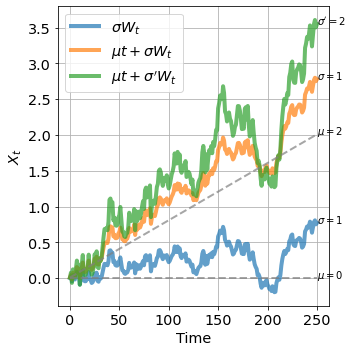

In [22]:
np.random.seed(1234)
mu = [0, 2, 2]
v = [1, 1, 2]
S0 = 1

N = 250
dt = 1 / 250
Z = np.random.normal(size = (N, 1))
Z = np.vstack([0, Z])
plt.figure(figsize = (5, 5))
for i in range(3):
    S = np.cumsum(mu[i] * dt + v[i] * np.sqrt(dt) * Z)
    plt.plot(S, alpha = 0.7)
    if i < 2:
        plt.text(250, S[-1], "$\sigma = {0}$".format(v[i]))
    elif i == 2:
        plt.text(250, S[-1], "$\sigma' = {0}$".format(v[i]))
plt.legend(["$\sigma W_t$", "$\mu t + \sigma W_t$", "$\mu t + \sigma' W_t$"])

for i in range(2):
    mean = np.cumsum(mu[i] * dt * np.ones(S.shape))
    plt.plot(mean, ls = "--", color = "gray", alpha = 0.7, lw = 2)
    plt.text(250, mean[-1], "$\mu = {0}$".format(mu[i]))

plt.grid(True)
plt.xlabel("Time")
plt.ylabel("$X_t$")
plt.savefig("options_weiner_process.pdf")

### Example: Geometric Brownian Motion
- Let $\mu$ be the expected return rate, $\sigma$ be the annual volatility, and $T$ be the time to maturity.
- Then we assume that $$\dfrac{dS}{S} = \mu dt + \sigma dW,$$ where $W$ is a Wiener process.
- By Ito's lemma, we have $$S_T = S_0 e^{(r - \sigma^2 / 2) T + \sigma W_T},$$ where $W_T = \sqrt{T} Z$ and $Z \sim N(0, 1).$

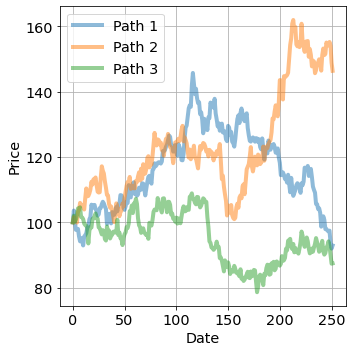

In [23]:
mu = 0.1
v = 0.3
S0 = 100

N = 250
dt = 1 / 250

plt.figure(figsize = (5, 5))
for _ in range(3):
    Z = np.random.normal(size = (N + 1, 1))
    S = S0 * np.cumprod(np.vstack([1, np.exp((mu - 0.5 * v ** 2) * dt + v * np.sqrt(dt) * Z)]))
    plt.plot(S, alpha = 0.5)
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(["Path 1", "Path 2", "Path 3"])
plt.savefig("options_price_paths.pdf")

### Example: Price Path Simulation

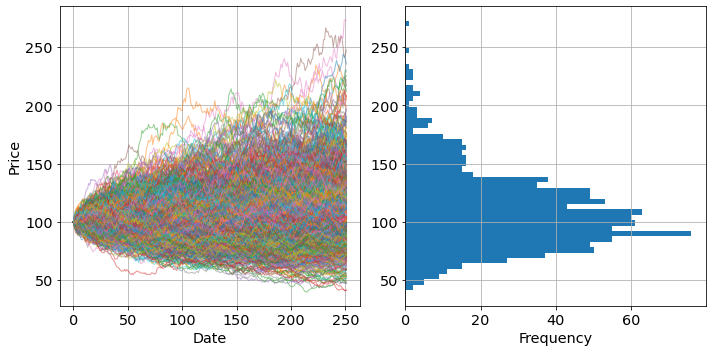

In [24]:
mu = 0.1
v = 0.3
S0 = 100

N = 250
dt = 1 / 250

final_prices = []
plt.figure(figsize = (10, 5))
plt.subplot(121)
for _ in range(1000):
    Z = np.random.normal(size = (N + 1, 1))
    S = S0 * np.cumprod(np.vstack([1, np.exp((mu - 0.5 * v ** 2) * dt + v * np.sqrt(dt) * Z)]))
    plt.plot(S, alpha = 0.5, lw = 1)
    final_prices.append(S[-1])
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Price")
bottom, top = plt.ylim()

plt.subplot(122)
plt.hist(final_prices, orientation = "horizontal", bins = 50)
plt.xlabel("Frequency")
plt.grid(True)
plt.ylim(bottom, top)

plt.savefig("options_price_paths_1000.pdf")

### Example: Monte Carlo Method for European Call Options

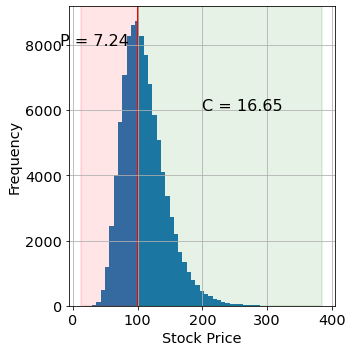

In [25]:
S0 = 100
X = 100
r = 0.1
v = 0.3
T = 1

N = 100000
S = S0 * np.exp((r - 0.5 * v ** 2) * T + v * np.sqrt(T) * np.random.normal(size = (N, 1)))
C = np.sum(S[S > X] - X) / N / np.exp(r * T)
P = np.sum(X - S[X > S]) / N / np.exp(r * T)

plt.figure(figsize = (5, 5))
plt.hist(S, bins = 51)
low, high = plt.xlim()
plt.axvspan(X, X, color = "r", linewidth = 2)
plt.axvspan(X, high, color = "green", linewidth = 2, alpha = 0.1)
plt.axvspan(low, X, color = "red", linewidth = 2, alpha = 0.1)
plt.text(200, 6000, "C = {0:.2f}".format(C), fontsize = 16)
plt.text(-20, 8000, "P = {0:.2f}".format(P), fontsize = 16)
plt.grid(True)
plt.xlabel("Stock Price")
plt.ylabel("Frequency")

plt.savefig("options_mc_euro_options.pdf")

### Example: Implied Volatility

In [26]:
def newton_iv(option_price, option_type, S0, X, r, T, init_v = 0.3):
    
    from scipy.stats import norm

    tolerance = 1e-9
    xnew = init_v
    xold = 0
    
    d1 = lambda x : (np.log(S0 / X) + (r + x ** 2 * 0.5) * T) / np.sqrt(T) / x
    vega = lambda x : S0 * np.sqrt(T) * norm.pdf(d1(x))
    if option_type == "C":
        fx = lambda x : option_price - call_bs_formula(S0, X, r, x, T)
    elif option_type == "P":
        fx = lambda x : option_price - put_bs_formula(S0, X, r, x, T)
    else:
        raise Exception("Cannot calculate the implied volatility...")
    
    cnt = 0
    while abs(xnew - xold) > tolerance and cnt < 100:
        cnt += 1
        xold = xnew
        xnew = xold + fx(xold) / vega(xold)
        
    return xnew

In [27]:
!wget https://www.csie.ntu.edu.tw/~d00922011/python/data/txo20190830.csv

--2021-09-14 09:16:24--  https://www.csie.ntu.edu.tw/~d00922011/python/data/txo20190830.csv
Resolving www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)... 140.112.30.26
Connecting to www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)|140.112.30.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2211 (2.2K) [text/csv]
Saving to: ‘txo20190830.csv.1’

txo20190830.csv.1   100%[===================>]   2.16K  --.-KB/s    in 0s      

2021-09-14 09:16:25 (109 MB/s) - ‘txo20190830.csv.1’ saved [2211/2211]



In [28]:
import pandas as pd
import datetime

df = pd.read_csv('./txo20190830.csv', encoding = 'big5') # 
today_date = datetime.datetime(2019, 8, 30)
date_to_maturity = datetime.datetime(2019, 9, 18)
time_to_maturity = (date_to_maturity - today_date).days
print("T = {} days".format(time_to_maturity))

T = 19 days


In [29]:
S = 10576
r = 0.00
T = time_to_maturity / 365.0

rows, cols = df.shape
df["IV_c"] = np.zeros((rows, 1))
df["IV_p"] = np.zeros((rows, 1))

for i in range(rows):
    df["IV_c"][i] = newton_iv(df["結算價"][i], "C", S, df["履約價"][i], r, T)
    df["IV_p"][i] = newton_iv(df["結算價.1"][i], "P", S, df["履約價"][i], r, T)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A 

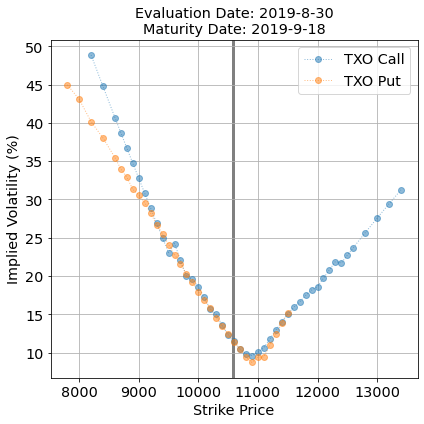

In [30]:
plt.figure(figsize = (6, 6))
plt.plot(df['履約價'], df['IV_c'] * 100, 'o:', lw = 1, alpha = 0.5)
plt.plot(df['履約價'], df['IV_p'] * 100, 'o:', lw = 1, alpha = 0.5)
plt.xlabel("Strike Price")
plt.ylabel('Implied Volatility (%)')
plt.axvspan(S, S, color = "gray", lw = 3)
plt.legend(["TXO Call", "TXO Put"])
plt.title("Evaluation Date: 2019-8-30\nMaturity Date: 2019-9-18")
plt.grid(True)

plt.tight_layout(False)
plt.savefig("options_txo_impv.pdf")
plt.show()

In [31]:
def impv_func(today_date, maturity_date, filename, S, codec = "big5"):

    df = pd.read_csv(filename, encoding = codec)
    dates_to_maturity = (maturity_date - today_date).days
    print("T = {} days".format(dates_to_maturity))

    r = 0.00
    T = dates_to_maturity / 365.0

    if T == 0:
        T = 1e-6

    rows, cols = df.shape
    df["IV_c"] = np.zeros((rows, 1))
    df["IV_p"] = np.zeros((rows, 1))

    for i in range(rows):
        df["IV_c"][i] = newton_iv(df["結算價"][i], "C", S, df["履約價"][i], r, T)
        df["IV_p"][i] = newton_iv(df["結算價.1"][i], "P", S, df["履約價"][i], r, T)

    fig, ax = plt.subplots(figsize = (6, 6))
    ax.plot(df["履約價"], df["IV_c"] * 100, 'o:', lw = 1, alpha = 0.5)
    ax.plot(df["履約價"], df["IV_p"] * 100, 'o:', lw = 1, alpha = 0.5)
    ax.set_xlabel("Strike Price")
    ax.set_ylabel('Implied Volatility (%)')
    plt.axvspan(S, S, color = "gray", lw = 3)
    plt.legend(["TXO Call", "TXO Put"])
    plt.title("Evaluation Date: {0}\nMaturity Date: {1}".format(today_date.strftime('%Y-%m-%d'), maturity_date.strftime('%Y-%m-%d')))
    plt.grid(True)
    
    plt.tight_layout(False)
    plt.savefig(filename.split(".")[0] + ".pdf")

    return fig 

In [32]:
!wget https://www.csie.ntu.edu.tw/~d00922011/python/data/txo20210512.csv

--2021-09-14 09:16:27--  https://www.csie.ntu.edu.tw/~d00922011/python/data/txo20210512.csv
Resolving www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)... 140.112.30.26
Connecting to www.csie.ntu.edu.tw (www.csie.ntu.edu.tw)|140.112.30.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3338 (3.3K) [text/csv]
Saving to: ‘txo20210512.csv.1’

txo20210512.csv.1   100%[===================>]   3.26K  --.-KB/s    in 0s      

2021-09-14 09:16:27 (135 MB/s) - ‘txo20210512.csv.1’ saved [3338/3338]



T = 7 days


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

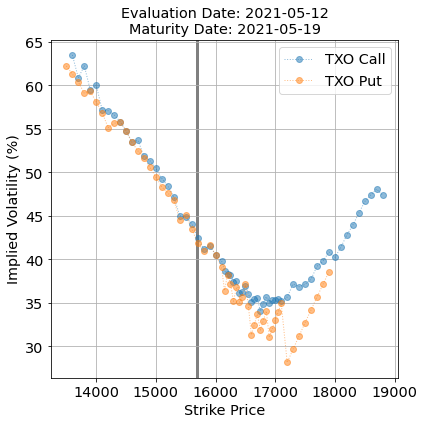

In [33]:
today_date = datetime.datetime(2021, 5, 12)
maturity_date = datetime.datetime(2021, 5, 19)
filename = "txo20210512.csv"
S = 15692
impv_func(today_date, maturity_date, filename, S)
print()

## Case Study: VIX

In [34]:
%%capture

!pip install ffn yfinance

import ffn
import yfinance as yf

In [35]:
tbl = pd.DataFrame(yf.download("^vix, ^GSPC", start = "1992-01-01")["Adj Close"])
tbl.dropna(inplace = True)
tbl.columns = [x[1:].lower() for x in tbl.columns]
tbl

[*********************100%***********************]  2 of 2 completed


,gspc,vix
Date,,
1992-01-02,417.260010,18.950001
1992-01-03,419.339996,18.750000
1992-01-06,417.959991,18.959999
1992-01-07,417.399994,19.230000
1992-01-08,418.100006,18.719999
...,...,...
2021-09-07,4520.029785,18.139999
2021-09-08,4514.069824,17.959999
2021-09-09,4493.279785,18.799999


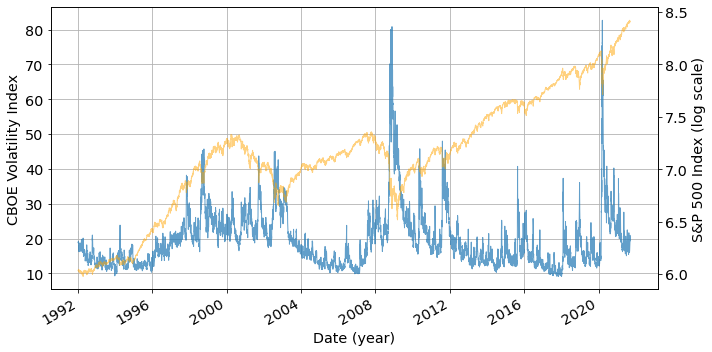

In [36]:
ax = tbl["vix"].plot.line(lw = 1, figsize = (10, 5), alpha = 0.7)
plt.xlabel("Date (year)")
plt.ylabel("CBOE Volatility Index")
ax.grid(True)

ax2 = ax.twinx()
np.log(tbl["gspc"]).plot.line(color = "orange", lw = 1, alpha = 0.5)
ax2.set_ylabel("S&P 500 Index (log scale)")

plt.savefig("options_vix_log.pdf")
plt.show()

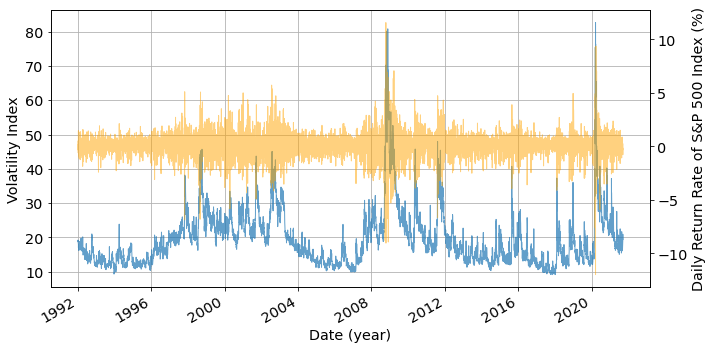

In [37]:
ax = tbl["vix"].plot.line(lw = 1, figsize = (10, 5), alpha = 0.7)
plt.xlabel("Date (year)")
plt.ylabel("Volatility Index")
ax.grid(True)

ax2 = ax.twinx()
(tbl["gspc"].pct_change() * 100).plot.line(color = "orange", lw = 1, alpha = 0.5)
ax2.set_ylabel("Daily Return Rate of S&P 500 Index (%)")

plt.savefig("options_vix_r.pdf")
plt.show()

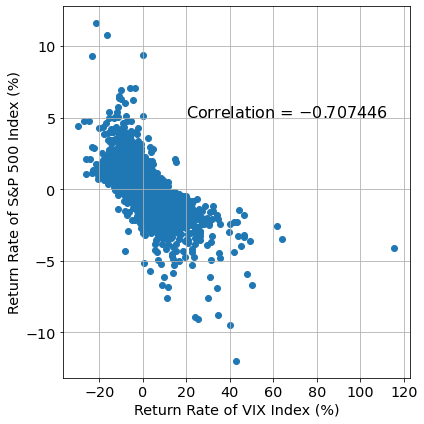

In [38]:
plt.figure(figsize = (6, 6))
plt.scatter(tbl["vix"].pct_change() * 100, tbl["gspc"].pct_change() * 100)
plt.ylabel("Return Rate of S&P 500 Index (%)")
plt.xlabel("Return Rate of VIX Index (%)")
plt.grid(True)
corr = np.corrcoef(tbl["gspc"].pct_change().dropna() * 100, tbl["vix"].pct_change().dropna() * 100)
plt.text(20, 5, "Correlation = $-${0:2F}".format(-corr[0, 1]), fontsize = 16)

plt.savefig("options_vix_corr.pdf")

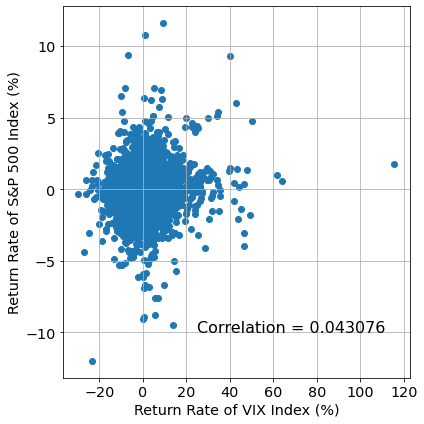

In [39]:
plt.figure(figsize = (6, 6))
plt.scatter(tbl["vix"].pct_change()[:-1] * 100, tbl["gspc"].pct_change()[1:] * 100) # vix at time t vs. sp500 at time t + 1
plt.ylabel("Return Rate of S&P 500 Index (%)")
plt.xlabel("Return Rate of VIX Index (%)")
plt.grid(True)
corr = np.corrcoef(tbl["gspc"].pct_change().dropna()[1:] * 100, tbl["vix"].pct_change().dropna()[:-1] * 100)
plt.text(25, -10, "Correlation = {0:2F}".format(corr[0, 1]), fontsize = 16)

plt.savefig("options_vix_corr_lag.pdf")

## Financial Stochastic Processes


### Mean-Reverting Process
- For example, interest rate, commodity, VIX.
- The famous mean-reverting models are as follows:
    - **Ornstein-Uhlenbeck process** (1930)
        > The Ornstein–Uhlenbeck process can also be considered as the continuous-time analogue of the discrete-time AR(1) process.
    - **Vasicek model** (1977)
    - **Cox-Ingersoll-Ross (CIR) model** (1985)
        - The model follows
$$dr_t = \kappa (\theta - r_t) dt + \sigma \sqrt{r_t} dW_t,$$ where $\kappa > 0$ is the mean-reverting rate, $\theta$ is the long-term mean, and $\sigma$ is the volatility of $r_t$.

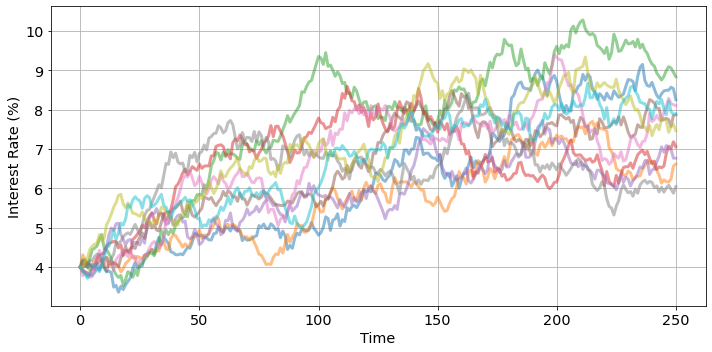

In [40]:
r0 = 0.04
theta = 0.08
k = 2
v = 0.1
T = 1
N = 250
dt = T / N;

plt.figure(figsize = (10, 5))
for j in range(10):
    r = np.zeros([N + 1, 1])
    r[0] = r0
    for i in range(N):
        curr_r = r[i]
        if curr_r < 0:
            curr_r = 0 # Euler scheme
        r[i + 1] = curr_r + k * (theta - curr_r) * dt + np.sqrt(dt * curr_r) * v * np.random.randn(1)
    plt.plot(r * 100, lw = 3, alpha = 0.5)
    
plt.grid()
plt.ylabel("Interest Rate (%)")
plt.xlabel("Time")
plt.show()
plt.savefig("mean-reverting-process.pdf")

### Stochastic Volatility Model
* As you can see, the diffusion term of CIR model is nondeterministic; CIR model is one of stochastic volaility models.
* Here we consider the **Heston model** (1993), which is given by $$\dfrac{dS_t}{S_t} = r dt + \sqrt{V_t} dW_{t, 1},$$ $$dV_t = \kappa (\theta - V_t) dt + \sigma \sqrt{V_t} dW_{t, 2},$$ where $\kappa > 0$ is the mean-reverting rate, $\theta$ is the long-term mean of $V_t$, $\sigma$ is the volatility of $V_t$, and $dW_{1, t}dW_{2, t} = \rho dt$.
* For MC simulation, we follow the simulation scheme by:
    * https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1153950

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

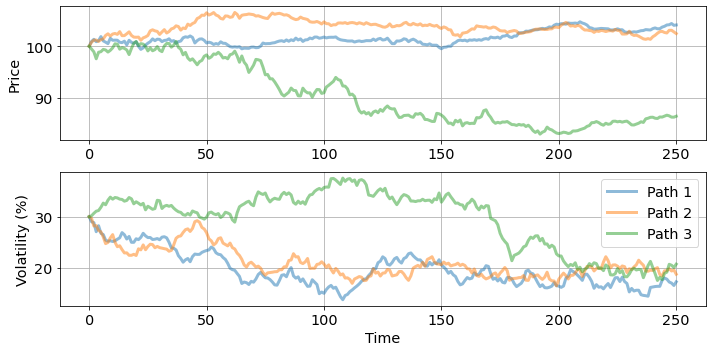

In [41]:
s0 = 100
r = 0.01
N = 250

v0 = 0.09
theta = 0.04
k = 3
s = 0.3

rho = -0.7

S = np.zeros([N + 1, 1])
v = np.zeros([N + 1, 1])

plt.figure(figsize = (10, 5))
for _ in range(3):
    S[0] = s0
    v[0] = v0
    for i in range(N):
        S[i + 1] = S[i] * np.exp((r - 0.5 * v[i] ** 2) * dt + np.sqrt(dt) * v[i] * np.random.randn(1))
        v[i + 1] = v[i] + k * (theta - v[i]) * dt + np.sqrt(dt) * s * np.sqrt(v[i]) * np.sqrt(1 - rho ** 2) * np.random.randn(1)
    v = np.sqrt(v)

    plt.subplot(211)
    plt.plot(S, lw = 3, alpha = 0.5)
    plt.grid()
    plt.ylabel("Price")
    plt.subplot(212)
    plt.plot(v * 100, lw = 3, alpha = 0.5)

plt.legend(["Path 1", "Path 2", "Path 3"])
plt.grid()
plt.ylabel("Volatility (%)")
plt.xlabel("Time")
plt.show()
plt.savefig("heston-model.pdf")

### Jump-Diffusion Process
* Merton's jump-diffusion process (1976)
    * See https://www.csie.ntu.edu.tw/~lyuu/finance1/2018/20180516.pdf.

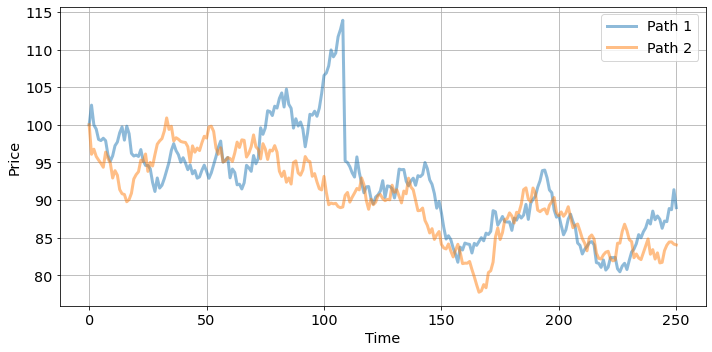

In [42]:
S0 = 100
r = 0.05
v = 0.2
intensity = 0.2
mu = -0.1
delta = 0.25
T = 1
N = 250

dt = T / N
rj = intensity * (np.exp(mu + 0.5 * delta ** 2) - 1)
S = np.zeros([N + 1, 1])
plt.figure(figsize = (10, 5))

for _ in range(2):
    S[0] = S0
    for i in range(N):
        S[i + 1] = S[i] * (np.exp((r - rj - 0.5 * v ** 2) * dt + v * np.sqrt(dt) * np.random.randn(1)) + (np.exp(mu + delta * np.random.randn(1)) - 1) * np.random.poisson(intensity * dt, 1))
    plt.plot(S, lw = 3, alpha = 0.5)

plt.grid()
plt.legend(["Path 1", "Path 2"])
plt.xlabel("Time")
plt.ylabel("Price")
plt.savefig("jump-diffusion.pdf")